# Kernelized Perceptron Algorithm

## Theory

The perceptron algorithm is a fundamental algorithm for binary classification. It iteratively adjusts a weight vector $\theta$ to find a hyperplane that separates the data into two classes. The standard perceptron update rule is:

$$
\theta^{(i+1)} = \theta^{(i)} + \alpha \left( y^{(i)} - h_{\theta^{(i)}}(x^{(i)}) \right) x^{(i)}
$$

where:
- $\theta^{(i)}$ is the weight vector at iteration $i$,
- $\alpha$ is the learning rate,
- $y^{(i)}$ is the true label,
- $h_{\theta}(x) = \text{sign}(\theta^\top x)$ is the prediction function.

To handle non-linearly separable data, we can project the input features into a higher-dimensional feature space using a mapping $\phi(x)$. However, explicitly computing $\phi(x)$ can be computationally expensive or infeasible. The **kernel trick** allows us to compute the inner product $\phi(x)^\top \phi(z)$ efficiently using a kernel function $K(x, z)$ without explicitly computing $\phi(x)$.

In the kernelized perceptron, the weight vector $\theta$ is represented as a linear combination of the training examples:

$$
\theta = \sum_{j=1}^{N} \alpha_j y^{(j)} x^{(j)}
$$

where $N$ is the number of training examples, and $\alpha_j$ are the coefficients.

## Implementation

We implement the kernelized perceptron algorithm in Python. The perceptron maintains a list of support vectors and their corresponding coefficients. Predictions and updates are made using the kernel function.


In [32]:
import matplotlib.pyplot as plt
import numpy as np
import util

In [33]:
# Define kernels
def linear_kernel(x, z):
    """
    Linear kernel function.

    Args:
        x: First sample.
        z: Second sample.

    Returns:
        The linear kernel between x and z.
    """
    return np.dot(x, z)

def rbf_kernel(x, z, sigma=1.0):
    """
    Radial Basis Function (RBF) kernel.

    Args:
        x: First sample.
        z: Second sample.
        sigma: Bandwidth parameter.

    Returns:
        The RBF kernel between x and z.
    """
    distance = np.linalg.norm(x - z)
    return np.exp(- (distance ** 2) / (2 * sigma ** 2))

In [34]:
def sign(a):
    """Gets the sign of a scalar input, returns 0 or 1."""
    return 1 if a >= 0 else 0

In [35]:
def initial_state():
    """
    Return the initial state for the perceptron.
    The state will be a list to store the support vectors and their coefficients.
    """
    return []

In [36]:
def predict(state, kernel, x_i):
    """Perform a prediction on a given instance x_i given the current state and the kernel.

    Args:
        state: The state returned from initial_state(), a list of (alpha_i, x_i)
        kernel: A kernel function K(x, z)
        x_i: A vector containing the features for a single instance

    Returns:
        Returns the prediction (0 or 1)
    """
    result = 0
    for alpha_j, x_j in state:
        result += alpha_j * kernel(x_j, x_i)
    return sign(result)

In [37]:
def update_state(state, kernel, learning_rate, x_i, y_i):
    """Updates the state of the perceptron.

    Args:
        state: The state returned from initial_state()
        kernel: The kernel function
        learning_rate: The learning rate
        x_i: Input features for a single instance
        y_i: Label for a single instance (should be 0 or 1)
    """
    # Predict the label
    prediction = predict(state, kernel, x_i)
    if y_i != prediction:
        # Misclassified, update state
        error = y_i - prediction
        alpha_i = learning_rate * error
        state.append((alpha_i, x_i))

Kernel: linear, Test Accuracy: 0.53


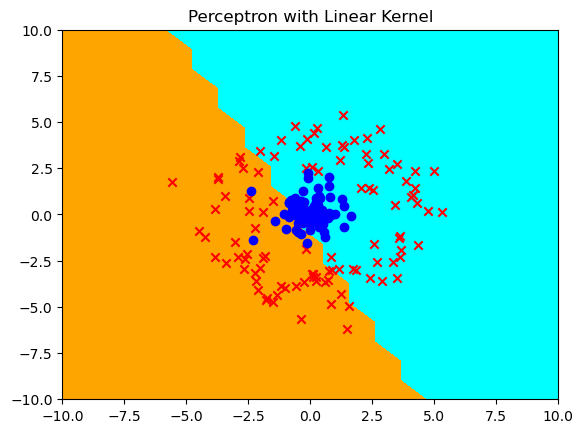

Kernel: rbf, Test Accuracy: 0.92


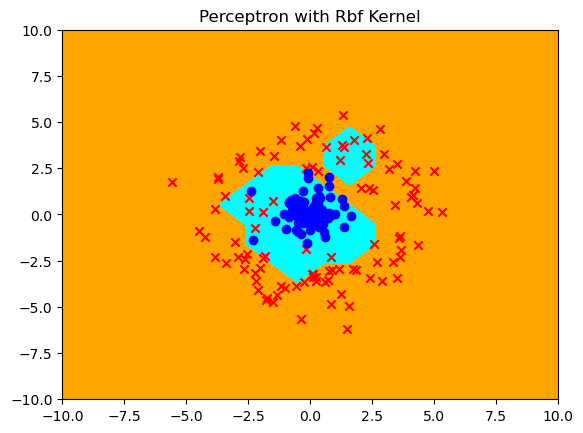

In [38]:
def main():
    """
    Main function to run the kernelized perceptron algorithm.
    """
    # Load training data
    X_train, y_train = util.load_csv('data/train_perceptron.csv')

    # Load test data
    X_test, y_test = util.load_csv('data/test_perceptron.csv')

    # Define kernels
    kernels = {'linear': linear_kernel, 'rbf': rbf_kernel}

    for kernel_name, kernel_func in kernels.items():
        # Initialize state
        state = initial_state()
        learning_rate = 1.0  # Adjust learning rate as needed

        # Train perceptron
        for x_i, y_i_i in zip(X_train, y_train):
            update_state(state, kernel_func, learning_rate, x_i, y_i_i)

        # Make predictions on test data
        y_pred = np.array([predict(state, kernel_func, x_i) for x_i in X_test])

        # Compute accuracy
        accuracy = np.mean(y_pred == y_test)
        print(f"Kernel: {kernel_name}, Test Accuracy: {accuracy:.2f}")

        # Plot decision boundary
        plt.figure()
        # Define predict_fn for plotting
        def predict_fn(x):
            x = np.array(x)
            return predict(state, kernel_func, x)
        util.plot_contour(predict_fn)
        util.plot_points(X_test, y_test)
        plt.title(f"Perceptron with {kernel_name.capitalize()} Kernel")
        plt.savefig(f"perceptron_{kernel_name}_output.png")
        plt.show()

if __name__ == '__main__':
    main()